In [3]:
# Cargando las librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
# Cargando los datos
filename = '/content/sample_data/encuesta_aeropuerto.csv'
datos = pd.read_csv(filename, header=0)
print(datos.shape)


(129880, 24)


In [5]:
# Convertir a dataframe
datos=pd.DataFrame(datos)

# Deteccion de variables

In [6]:
#Explorando la estructura del dataframe
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [7]:
#datos['Gender'].unique()
#datos['Customer Type'].unique()
datos['Class'].unique()   # todas son 2 pero class tiene 3 datos
#datos['Type of Travel'].unique()
#datos['satisfaction'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [8]:
# Revision de los nulos
datos.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [9]:
# Conteo de los nulos
datos['Arrival Delay in Minutes'].count()
#129487

129487

In [12]:
# una forma de eliminar los valore nulos de manera general
datos.dropna()
datos.dropna(axis=1, inplace=True)
# pero se pueden perder muchos datos talvez no sea la mejor opcion

# se puede aplicar un where para localizar los valores nulos
filter = datos['Arrival Delay in Minutes'].isna()
# o tambien
filter = datos['Arrival Delay in Minutes'].notna()

datos['Arrival Delay in Minutes'].where(filter ,other=0)

# where("se puede usar otra condicion")
datos['Arrival Delay in Minutes'].where(datos['Arrival Delay in Minutes']  > 10 ,other=0)
# pero para que se aplique debe tener inplace =True

# Aplica la mediana a todas las columnas de DF siempre y cuando sean numericas todas
# no funciona con presencia de varialbles categoricas
datos = datos.apply(lambda x: x.fillna(x.median()), axis=0)


KeyError: ignored

In [ ]:
# aplicar la mediana a datos nulos de una columnas especifica
datos["Arrival Delay in Minutes"].fillna(datos["Arrival Delay in Minutes"].median(), inplace = True)

# Imputar valores nulos pero por grupo , suponiendo que los hombres viajan consideramente mas que las mujeres
# seria incorrecto aplicar la misma media para ambos grupos entonces

datos.groupby('Gender')
datos.groupby('Gender')['Flight Distance']
datos.groupby('Gender')['Flight Distance'].median()
datos.groupby('Gender')['Flight Distance'].apply(lambda x: x.fillna(x.median()),inplace = True)
datos['Flight Distance']=datos.groupby('Gender')['Flight Distance'].apply(lambda x: x.fillna(x.median()))


In [ ]:
# si los valores nulos fueran categoricos
datos["Gender"].fillna("Desconocido", inplace=True)
# si queremos llenar el valor con el dato anterior
datos=datos.fillna(method='ffill')
# si queremos llenar el valor con el dato siguiente
datos=datos.fillna(method='bfill')


In [ ]:
# Revision de los nulos
datos.isnull().sum()

<AxesSubplot:>

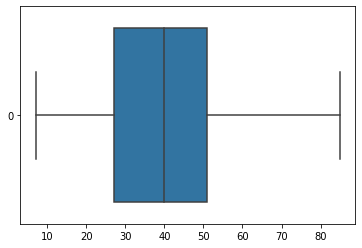

In [ ]:
# Boxplot de la edad
sns.boxplot(data=datos["Age"], orient="h")

<AxesSubplot:>

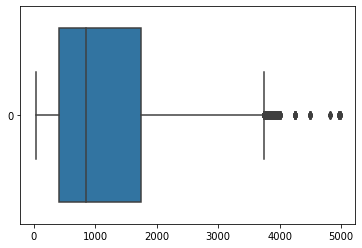

In [ ]:
# Atiplicos de la distancia de vuelo
sns.boxplot(data=datos["Flight Distance"], orient="h")

In [ ]:
#Calcular los valores atípicos utilizando el método de Tukey
Q1=datos['Flight Distance'].quantile(0.25)
Q3=datos['Flight Distance'].quantile(0.75)
IQR=Q3-Q1
mediana=datos['Flight Distance'].median()
valor_minimo=datos['Flight Distance'].min()
valor_maximo=datos['Flight Distance'].max()

print(Q1)
print(Q3)
print(IQR)
print(mediana)
print(valor_minimo)
print(valor_maximo)

# si los valores son inferiores
#df_filtered = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]


414.0
1744.0
1330.0
844.0
31
4983


In [ ]:
# Muestra cuales son los limites
atipico_inferior=Q1-(1.5*IQR)
print(f' El atipico superior es :{atipico_inferior} ')
atipico_superior=Q3+(1.5*IQR)
print(f' El atipico superior es :{atipico_superior} ')

 El atipico superior es :-1581.0 
 El atipico superior es :3739.0 


In [ ]:
# se crea un nuevo df con los ID de las columnas con valores atipicos para revisar los datos
ubicacion_outlayers=datos['Flight Distance']>atipico_superior
ubicacion_outlayers

In [ ]:
# se crea un DF con los autlayers para revisarlos por aparte
outlayers=datos[ubicacion_outlayers]
outlayers

In [ ]:
# se conforma un DF con los valores optimos osea sin autlayers
df_clean=datos

In [ ]:
# se conforma un DF con los valores optimos osea sin autlayers
df_filtrado = df_clean.loc[df_clean['Flight Distance'] <= atipico_superior]
df_filtrado

In [ ]:
# se puede hacer de forma manual
trabajo=df_clean[(df_clean['Flight Distance'] <3500)]
trabajo

<AxesSubplot:>

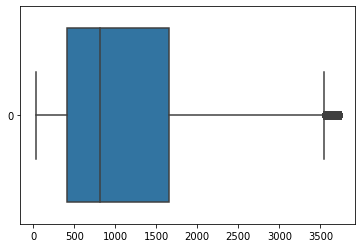

In [ ]:
# se revisa que la variable ya no tiene los atipicos
sns.boxplot(data=df_filtrado["Flight Distance"], orient="h")

<AxesSubplot:>

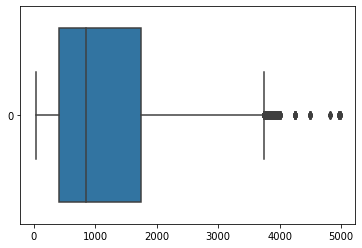

In [ ]:
# los comparamos para ver que efectivamente los elimino
sns.boxplot(data=datos["Flight Distance"], orient="h")

<AxesSubplot:xlabel='Customer Type', ylabel='Age'>

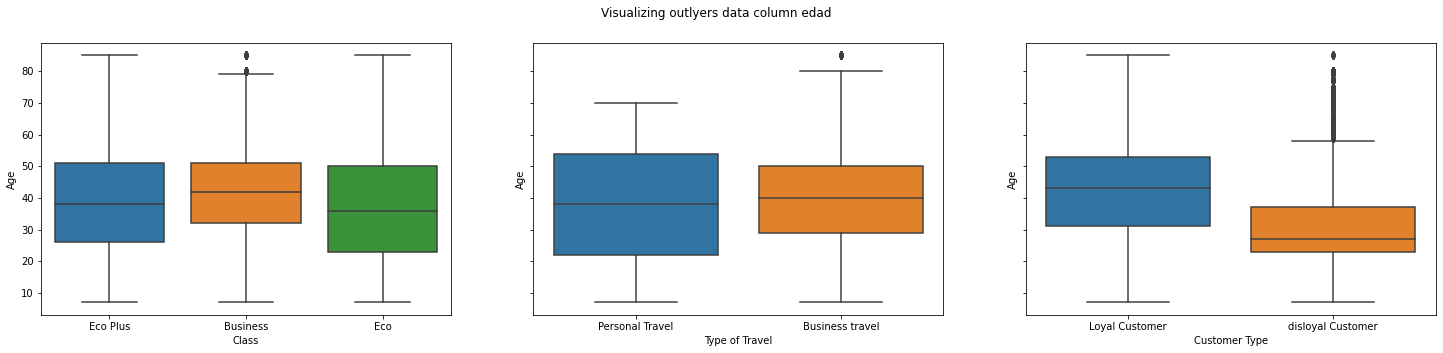

In [ ]:
# se pueden ver los valores outlayer de otras variables
fig, axes = plt.subplots(1, 3, figsize=(25, 5), sharey=True)
fig.suptitle('Visualizing outlyers data column edad')
sns.boxplot(x = 'Class', y = 'Age', data = datos,ax=axes[0])
sns.boxplot(x = 'Type of Travel', y = 'Age', data = datos,ax=axes[1])
sns.boxplot(x = 'Customer Type', y = 'Age', data = datos,ax=axes[2])

# Transformacion de varialbles y Generacion de variables dummies

In [ ]:
df =datos
# se tranforman las varialbes que tiene mas de 2 valores en la columnas
df.replace({
    'Class': {
        'Eco Plus': 0,
        'Business': 1,
        'Eco': 2,
    }
}, inplace=True)

In [ ]:
# se tranforman todas varialbes que tiene 2 valores en la columnas
df = pd.get_dummies(
    datos,
    columns=['Gender','Type of Travel', 'Customer Type','satisfaction'],
    drop_first=True
)

In [ ]:
#se revisa la nueva informacion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Age                                129880 non-null  int64  
 2   Class                              129880 non-null  int64  
 3   Flight Distance                    129880 non-null  int64  
 4   Inflight wifi service              129880 non-null  int64  
 5   Departure/Arrival time convenient  129880 non-null  int64  
 6   Ease of Online booking             129880 non-null  int64  
 7   Gate location                      129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Online boarding                    129880 non-null  int64  
 10  Seat comfort                       129880 non-null  int64  
 11  Inflight entertainment             1298

In [ ]:
# datos de las columnas transformadas
df['Class'].unique()

array([0, 1, 2])

In [ ]:
# se elimina el ID del dataset
df = df.drop(['id'], axis=1)

In [ ]:
display(df)

# Escarlado variables

Colocar a las variables en un rango de valores entres 0 y 1 para que esten en un mismo rango para que seran comparables
para que una variable no influya o pese mas que otra variable generalmente se hace cuando existen atributos con escalas muy diferentes

<Figure size 2160x720 with 0 Axes>

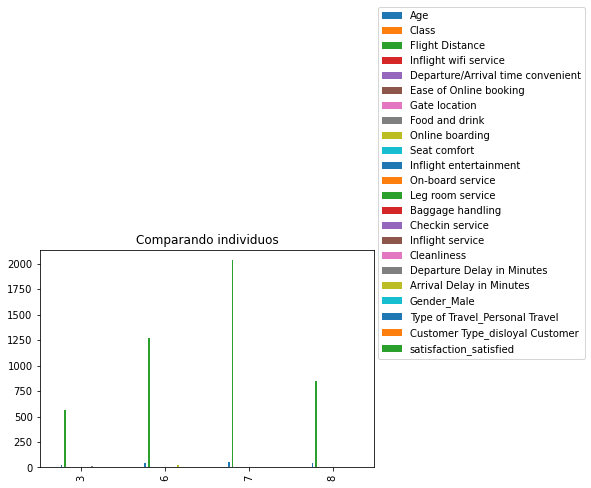

In [ ]:
# se genera la grafica sin escalar para demostrar el problema
fig = plt.figure(figsize=(30, 10))
sin_escalar=df.iloc[[3,6,7,8],]
sin_escalar.plot(kind="bar")
plt.legend(loc=(1.01,0.5))
plt.title("Comparando individuos")
plt.show()

Rango de 0 a 1 para scalar

In [13]:
#se toman los nombres de las columnas para despues de la transformacion
datos_num=df.columns
datos_num

NameError: ignored

In [ ]:
# se crea una nuevo dataser con los datos escalados
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
datos_transform = ColumnTransformer([('Escalados',MinMaxScaler(feature_range=(0,1)),datos_num)])


In [ ]:
datos_transform

ColumnTransformer(transformers=[('Escalados', MinMaxScaler(),
                                 Index(['Age', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Type of Travel_Personal Travel',
       'Customer Type_disloyal Customer', 'satisfaction_satisfied'],
      dtype='object'))])

In [ ]:
# se aplica la transformacion
datos_escalados=datos_transform.fit_transform(df)

In [ ]:
datos_escalados

array([[0.07692308, 0.        , 0.08663166, ..., 1.        , 0.        ,
        0.        ],
       [0.23076923, 0.5       , 0.04119548, ..., 0.        , 1.        ,
        0.        ],
       [0.24358974, 0.5       , 0.2243538 , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.12820513, 1.        , 0.16094507, ..., 1.        , 0.        ,
        0.        ],
       [0.08974359, 0.5       , 0.22132472, ..., 0.        , 0.        ,
        1.        ],
       [0.44871795, 1.        , 0.0470517 , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
# se establecen los nombres de las columnas y se convierte a DF
datos_escalados_df=pd.DataFrame(datos_escalados)
datos_escalados_df.columns =list(df.columns.values)
datos_escalados_df

In [ ]:
# describimos los nuevos datos
datos_escalados_df.describe()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Type of Travel_Personal Travel,Customer Type_disloyal Customer,satisfaction_satisfied
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,0.415743,0.688243,0.234111,0.545739,0.611520,0.551375,0.595385,0.640955,0.650527,0.688272,...,0.658029,0.661253,0.728439,0.657265,0.009242,0.009527,0.492616,0.309416,0.183092,0.434463
std,0.193838,0.308085,0.201424,0.265868,0.305348,0.280348,0.255704,0.265987,0.270144,0.263858,...,0.295006,0.253237,0.235334,0.262736,0.023914,0.024284,0.499947,0.462255,0.386743,0.495688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256410,0.500000,0.077342,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,...,0.500000,0.600000,0.600000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.423077,0.500000,0.164176,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.800000,...,0.750000,0.600000,0.800000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.564103,1.000000,0.345921,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,1.000000,...,1.000000,0.800000,1.000000,0.800000,0.007538,0.008207,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# evaluamos algunas filas
datos_escalados_df2=datos_escalados_df.iloc[[0,1,2,3],]
datos_escalados_df2

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Type of Travel_Personal Travel,Customer Type_disloyal Customer,satisfaction_satisfied
0,0.076923,0.0,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,...,0.75,0.8,1.0,1.0,0.015704,0.011364,1.0,1.0,0.0,0.0
1,0.230769,0.5,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,...,0.50,0.2,0.8,0.2,0.000628,0.003788,1.0,0.0,1.0,0.0
2,0.243590,0.5,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,...,0.75,0.8,0.8,1.0,0.000000,0.000000,0.0,0.0,0.0,1.0
3,0.230769,0.5,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,...,0.50,0.2,0.8,0.4,0.006910,0.005682,0.0,0.0,0.0,0.0


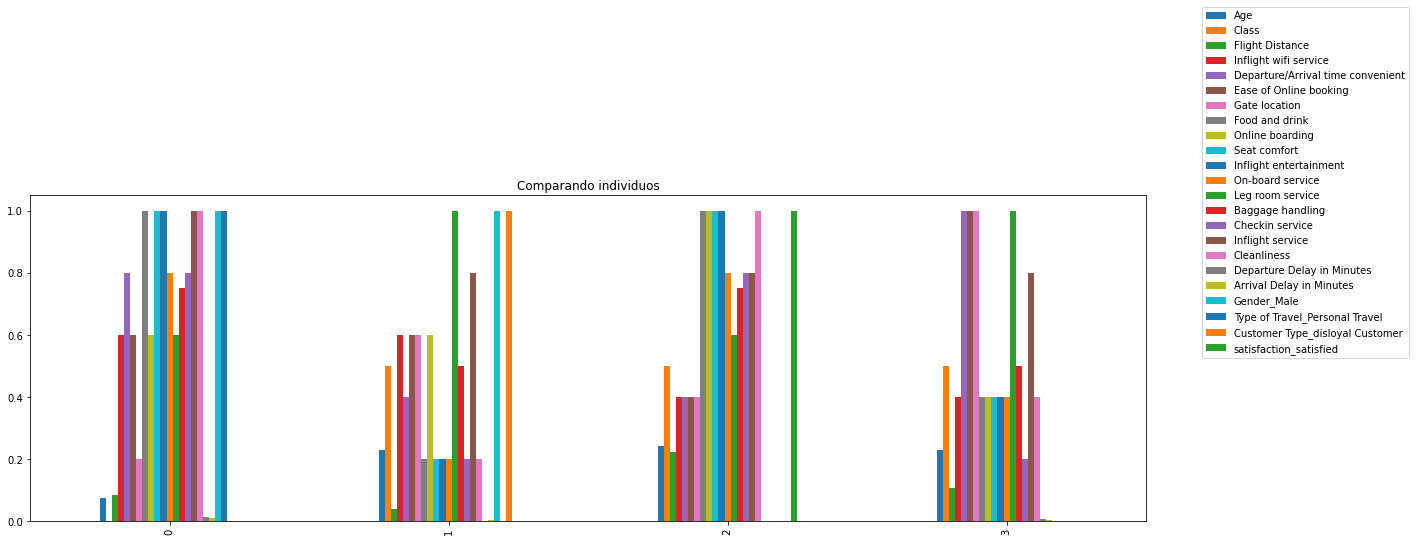

In [ ]:
# comparamos los datos ya escalados para ver que ahora si se leen mejor en el grafico
# ya que ahora pesan en un rango de 0 a 1
datos_escalados_df2.plot(kind="bar",figsize=(20, 6))
plt.legend(loc=(1.05,0.5))
plt.title("Comparando individuos")
plt.show()

In [ ]:
def exportar_archivo(df,nombre):
  nombre_archivo=nombre+'.xlsx'
  archivo = pd.ExcelWriter(nombre_archivo)
  df.to_excel(archivo)
  archivo.save()
  return df

In [ ]:
exportar_archivo(datos,'prueba')

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460.0,3.0,4.0,3.0,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25.0,Business travel,Business,235.0,3.0,2.0,3.0,...,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26.0,Business travel,Business,1142.0,2.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
3,24026,Female,Loyal Customer,25.0,Business travel,Business,562.0,2.0,5.0,5.0,...,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61.0,Business travel,Business,214.0,3.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19167,91601,Female,disloyal Customer,24.0,Business travel,Eco,1199.0,5.0,5.0,5.0,...,5.0,5.0,2.0,4.0,3.0,4.0,5.0,130.0,131.0,satisfied
19168,71723,Male,Loyal Customer,34.0,Business travel,Business,888.0,1.0,1.0,3.0,...,1.0,1.0,1.0,1.0,4.0,1.0,3.0,1.0,7.0,neutral or dissatisfied
19169,38186,Male,Loyal Customer,54.0,Personal Travel,Eco,1091.0,1.0,4.0,1.0,...,4.0,1.0,5.0,2.0,5.0,5.0,4.0,0.0,0.0,neutral or dissatisfied
19170,92930,Female,Loyal Customer,32.0,Business travel,Business,151.0,0.0,5.0,0.0,...,3.0,1.0,2.0,1.0,4.0,2.0,3.0,48.0,64.0,satisfied


# Estandarizacion de Variables

la idea es que cada variable tenga un valor promedio = a 0 y una desviacion estandar igual a 1

((x - media) / sd )

In [ ]:
# otro metodo es la estandarizacion de las variables
from sklearn.preprocessing import StandardScaler
estandarizacion = ColumnTransformer([('Estandarizados',StandardScaler(),datos_num)])

In [ ]:
# Aplicamos la estandarizacion
clientes=estandarizacion.fit_transform(datos_escalados_df2)

In [ ]:
clientes

array([[-1.7270121 , -1.73205081, -0.41756773,  1.        ,  0.57735027,
        -0.22941573, -1.18321596,  0.98019606, -0.22941573,  0.98019606,
         0.98019606,  0.96225045, -1.        ,  1.        ,  1.        ,
         1.73205081,  0.98019606,  1.56573091,  1.5011107 ,  1.        ,
         1.73205081, -0.57735027, -0.57735027],
       [ 0.51343603,  0.57735027, -1.08985925,  1.        , -0.96225045,
        -0.22941573,  0.16903085, -1.26025208, -0.22941573, -1.26025208,
        -1.26025208, -1.34715063,  1.        , -1.        , -1.        ,
        -0.57735027, -1.26025208, -0.82014476, -0.34641016,  1.        ,
        -0.57735027,  1.73205081, -0.57735027],
       [ 0.70014004,  0.57735027,  1.62022256, -1.        , -0.96225045,
        -1.14707867, -0.50709255,  0.98019606,  1.60591014,  0.98019606,
         0.98019606,  0.96225045, -1.        ,  1.        ,  1.        ,
        -0.57735027,  0.98019606, -0.91955625, -1.27017059, -1.        ,
        -0.57735027, -0.5773

In [ ]:
# reestablecemos las columnas
datos_estandarizados_df=pd.DataFrame(clientes)
datos_estandarizados_df.columns =list(df.columns.values)
datos_estandarizados_df

In [ ]:
# se describen los datos
datos_estandarizados_df.describe()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Type of Travel_Personal Travel,Customer Type_disloyal Customer,satisfaction_satisfied
count,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,...,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00
mean,0.000000,5.551115e-17,-1.422473e-16,4.718448e-16,0.000000,1.110223e-16,-5.551115e-17,-5.551115e-17,1.110223e-16,-5.551115e-17,...,0.000000,1.110223e-16,-6.661338e-16,-5.551115e-17,8.326673e-17,-9.020562e-17,0.000000,-5.551115e-17,-5.551115e-17,-2.775558e-17
std,1.154701,1.154701e+00,1.154701e+00,1.154701e+00,1.154701,1.154701e+00,1.154701e+00,1.154701e+00,1.154701e+00,1.154701e+00,...,1.154701,1.154701e+00,1.154701e+00,1.154701e+00,1.154701e+00,1.154701e+00,1.154701,1.154701e+00,1.154701e+00,1.154701e+00
min,-1.727012,-1.732051e+00,-1.089859e+00,-1.000000e+00,-0.962250,-1.147079e+00,-1.183216e+00,-1.260252e+00,-1.147079e+00,-1.260252e+00,...,-1.000000,-1.000000e+00,-5.773503e-01,-1.260252e+00,-9.195562e-01,-1.270171e+00,-1.000000,-5.773503e-01,-5.773503e-01,-5.773503e-01
25%,-0.046676,0.000000e+00,-5.856406e-01,-1.000000e+00,-0.962250,-4.588315e-01,-6.761234e-01,-8.401681e-01,-4.588315e-01,-8.401681e-01,...,-1.000000,-1.000000e+00,-5.773503e-01,-8.401681e-01,-8.449976e-01,-5.773503e-01,-1.000000,-5.773503e-01,-5.773503e-01,-5.773503e-01
50%,0.513436,5.773503e-01,-2.651817e-01,4.440892e-16,-0.192450,-2.294157e-01,-1.690309e-01,1.400280e-01,-2.294157e-01,1.400280e-01,...,0.000000,2.220446e-16,-5.773503e-01,1.400280e-01,-3.230873e-01,-1.154701e-01,0.000000,-5.773503e-01,-5.773503e-01,-5.773503e-01
75%,0.560112,5.773503e-01,3.204590e-01,1.000000e+00,0.769800,2.294157e-01,5.070926e-01,9.801961e-01,2.294157e-01,9.801961e-01,...,1.000000,1.000000e+00,-6.661338e-16,9.801961e-01,5.219103e-01,4.618802e-01,1.000000,0.000000e+00,0.000000e+00,0.000000e+00
max,0.700140,5.773503e-01,1.620223e+00,1.000000e+00,1.347151,1.605910e+00,1.521278e+00,9.801961e-01,1.605910e+00,9.801961e-01,...,1.000000,1.000000e+00,1.732051e+00,9.801961e-01,1.565731e+00,1.501111e+00,1.000000,1.732051e+00,1.732051e+00,1.732051e+00


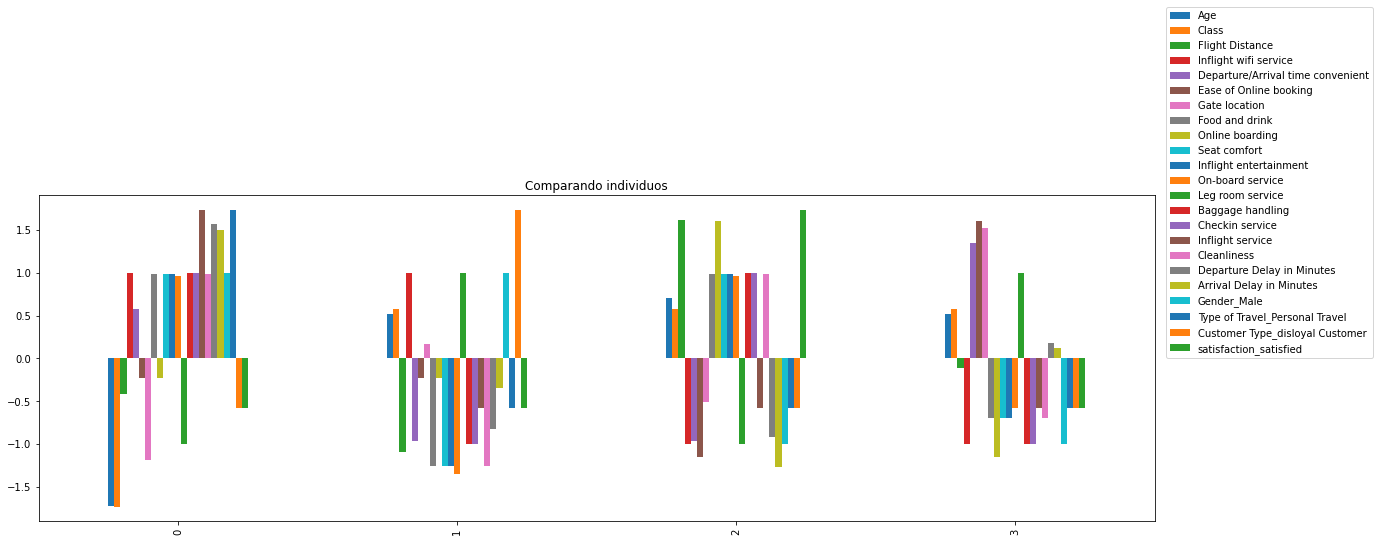

In [ ]:
# se aplica la comparacion pero con el metodo de estandarizacion
datos_estandarizados_df.plot(kind="bar",figsize=(20, 6))
plt.legend(loc=(1.01,0.5))
plt.title("Comparando individuos")
plt.show()

Comparando la dispercion de los variables , pérmite visualizar la distribucion de las variables con una curva de densidad  

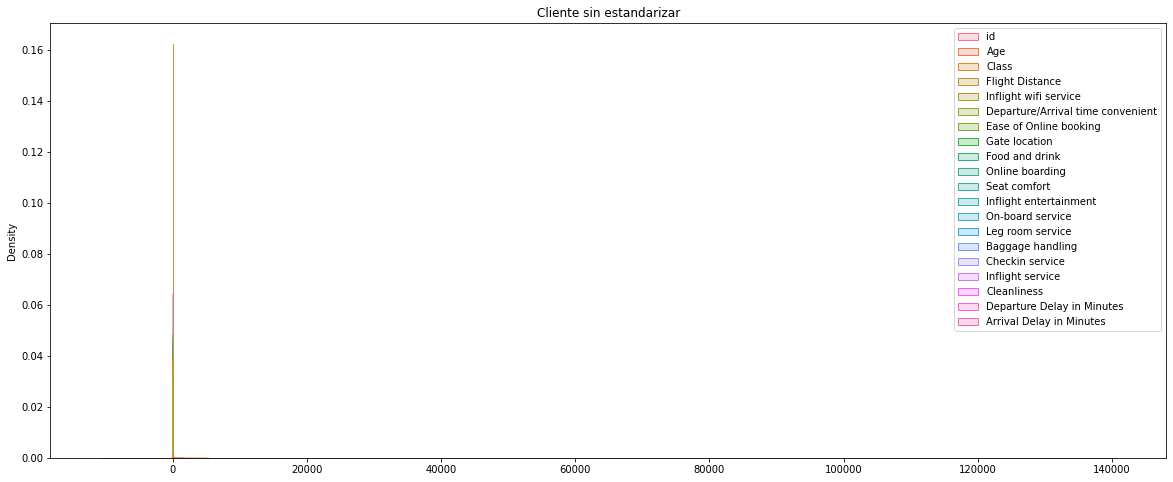

In [ ]:
# ver las curvas de las densidad parecido a un histograma
# con el dataser normal no se permite ver nada
import seaborn as sns
plt.figure(figsize=(20,8))
sns.kdeplot(data=datos,shade=True).set(title='Cliente sin estandarizar')
plt.show()

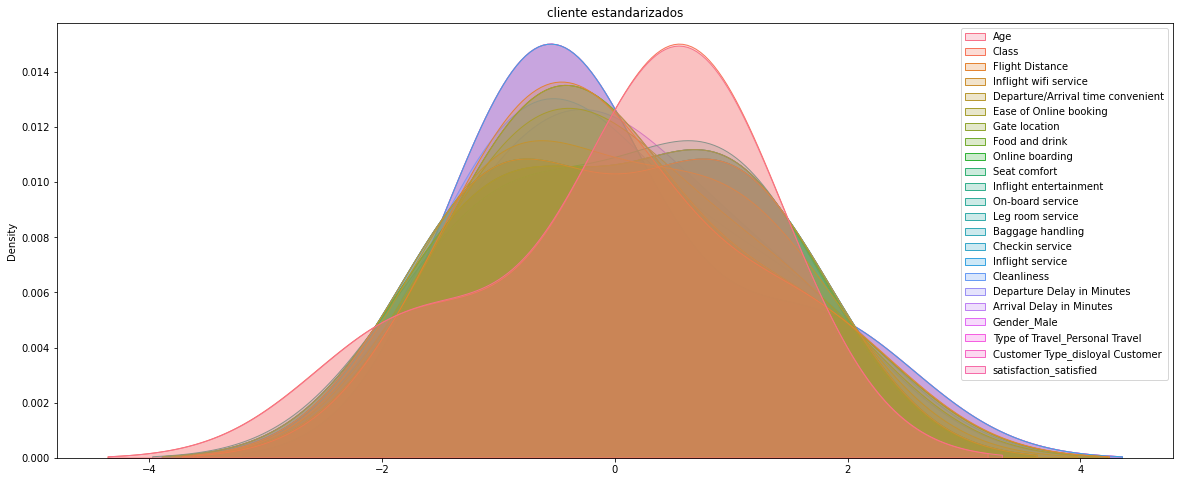

In [ ]:
# aplicando el metodo pero a los datos estandarizados
import seaborn as sns
plt.figure(figsize=(20,8))
sns.kdeplot(data=datos_estandarizados_df,shade=True).set(title='cliente estandarizados')
plt.show()